## Tarea 4 - Modelamiento
### Cargo: Ciencia de Datos: Nicolas Alvarez Ortiz

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [2]:
import pandas as pd
credit = pd.read_csv("datosproyecto2")


In [3]:
credit[credit["default payment next month"] == 1] #6636
credit[credit["default payment next month"] == 0].head() #23364

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,5,6,50000,1,1,2,37,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,6,7,500000,1,1,2,29,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0


¡OBSERVAMOS UN DESBALANCE EN LAS CLASES! \
Generamos nuestros vectores X & Y

In [4]:
X = credit.iloc[:,1:25]
y = credit["default payment next month"]

Realizamos un modelo utilizando sklearn y le aplicamos sobremuestreo a la data para balancear las clases.

In [52]:
#--------------------------------------------------------------
# Modelo con sklearn
#-------------------------------------------------------------- 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
# Aplicar sobremuestreo 
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train_resampled, y_train_resampled)
accuracy = pipeline.score(X_valid, y_valid)
print(round(accuracy,5))

0.75972


In [6]:
from joblib import dump
#dump(mlp_clf, 'modelo.joblib')

Generamos un reporte para evaluar las métricas del modelo

In [51]:
y_pred = mlp_clf.predict(X_test)
class_report = classification_report(y_test, y_pred)
print("Classification Report modelo sklearn:\n", class_report)

Classification Report modelo sklearn:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87      9357
           1       0.22      0.01      0.01      2643

    accuracy                           0.78     12000
   macro avg       0.50      0.50      0.44     12000
weighted avg       0.66      0.78      0.68     12000



c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Graficamos la matriz de consufión del modelo (con sklearn)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


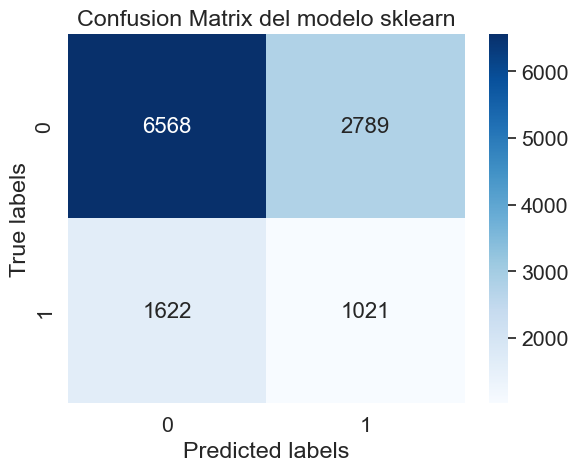

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
model_predictions1 = mlp_clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, model_predictions1)

# Plot confusion matrix
sns.set(font_scale=1.4)  # for label size
sns.heatmap(confusion_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt="g")  # font size
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix del modelo sklearn')
plt.show()

## Graficaremos la curva ROC

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


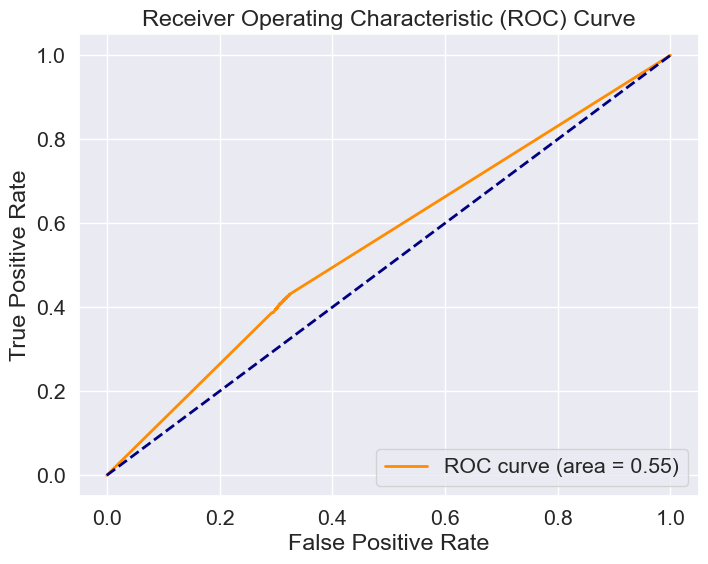

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_prob = mlp_clf.predict_proba(X_valid)[:, 1]
fpr, tpr, _ = roc_curve(y_valid, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Un AOC mayor de 0.5 indica que el modelo tiene poder de predicción

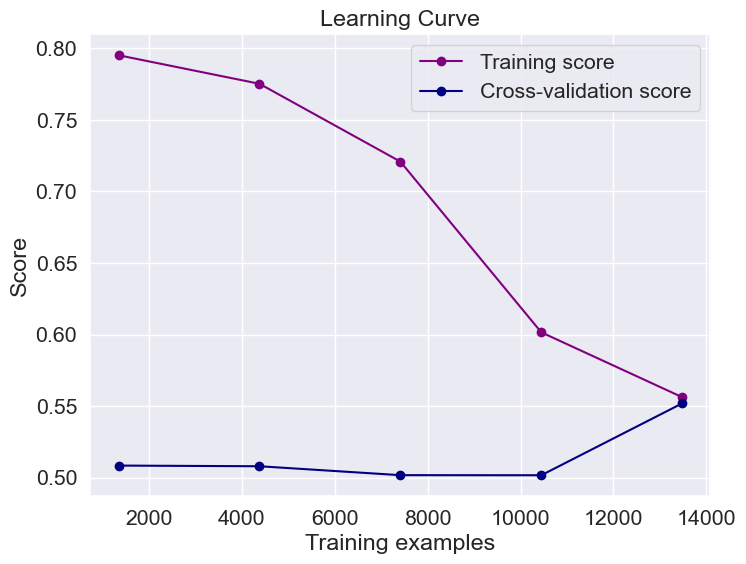

In [10]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(mlp_clf, X_train_resampled, y_train_resampled, cv=5)
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score',color="purple")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score',color="navy")
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.show()

### Oversampling vs Undersampling

Evaluamos undersampling (que suele ser mejor alternativa) para comparar cuál es mejor en este caso particular

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
# Aplicar oversampling a la clase pequeña
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
# Aplicar undersampling a la clase pequeña for comparison
rus = RandomUnderSampler(random_state=42)
X_train_resampled_under, y_train_resampled_under = rus.fit_resample(X_train, y_train)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000, random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train_resampled, y_train_resampled)
accuracy_oversampled = pipeline.score(X_valid, y_valid)

pipeline.fit(X_train_resampled_under, y_train_resampled_under)
accuracy_undersampled = pipeline.score(X_valid, y_valid)

print(accuracy_oversampled, accuracy_undersampled)
print("Concluimos que el método de oversampling tiene una mayor precisión que el método de undersampling.")


0.7597222222222222 0.75375
Concluimos que el método de oversampling tiene una mayor precisión que el método de undersampling.


SMOTE  y ADASYN son otras alternativas para tratar con bases desbalanceadas, por lo que evaluaremos su desempeño

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
resampling_techniques = {
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42)
}
results = {}
for name, resampler in resampling_techniques.items():
    X_train_resampled, y_train_resampled = resampler.fit_resample(X_train, y_train)
    mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000, random_state=42)
    pipeline = make_pipeline(StandardScaler(), mlp_clf)
    pipeline.fit(X_train_resampled, y_train_resampled)
    y_pred = pipeline.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    results[name] = accuracy
results


{'RandomOverSampler': 0.7597222222222222,
 'SMOTE': 0.7323611111111111,
 'ADASYN': 0.7281944444444445}

### Otro modelo usando Keras y tensorflow

In [45]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.4, random_state=42)
# Aplicar sobremuestreo 
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
import tensorflow as tf
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(24,)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="sigmoid"))    # Use sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(2, activation="sigmoid")) 
model.compile(loss="MeanSquaredError",  
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train_resampled, y_train_resampled, epochs=100,
                    validation_data=(X_valid, y_valid))

model.save('modelo_entrenado.h5')


Epoch 1/100
527/527 [==============================] - 1s 2ms/step - loss: 0.2589 - accuracy: 0.5014 - val_loss: 0.2495 - val_accuracy: 0.7744
Epoch 2/100
527/527 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4995 - val_loss: 0.2497 - val_accuracy: 0.7744
Epoch 3/100
527/527 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4995 - val_loss: 0.2499 - val_accuracy: 0.7744
Epoch 4/100
527/527 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4995 - val_loss: 0.2499 - val_accuracy: 0.7744
Epoch 5/100
527/527 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4995 - val_loss: 0.2500 - val_accuracy: 0.7744
Epoch 6/100
527/527 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4995 - val_loss: 0.2501 - val_accuracy: 0.7744
Epoch 7/100
527/527 [==============================] - 1s 2ms/step - loss: 0.2501 - accuracy: 0.4995 - val_loss: 0.2502 - val_accuracy: 0.7744

In [56]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

375/375 [==============================] - 2s 4ms/step - loss: 0.2501 - accuracy: 0.7791
Test accuracy: 0.7790833115577698


Observamos que el modelo con keras y tensorflow tiene un test accuracy de 0.02 mejor que el de sklearn \
Sin embargo, debemos evaluar métricas  precisión, el recall y el f1-score para tener una visión más completa de la calidad del modelo

In [47]:
model_predictions = model.predict(X_test)

375/375 [==============================] - 2s 4ms/step


In [57]:
from sklearn.metrics import classification_report

# Convertir las probabilidades predicted a etiquetas binarias
y_pred_labels = np.argmax(model.predict(X_valid), axis=-1)

class_report = classification_report(y_valid, y_pred_labels)


print("Classification Report modelo keras/tensorflow:\n", class_report)


225/225 [==============================] - 1s 3ms/step
Classification Report modelo keras/tensorflow:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      5582
           1       0.25      0.00      0.00      1618

    accuracy                           0.77      7200
   macro avg       0.51      0.50      0.44      7200
weighted avg       0.66      0.77      0.68      7200



Se observa que el f1-score para la clase Y=1 es tan solo se 0.08 y el recall es de 0.05 \
En el modelo de sklearn estas métricas son más altas para la clase Y=1 y para la clase Y=0 también son bastante altas para un modelo de clasificación

225/225 [==============================] - 1s 5ms/step


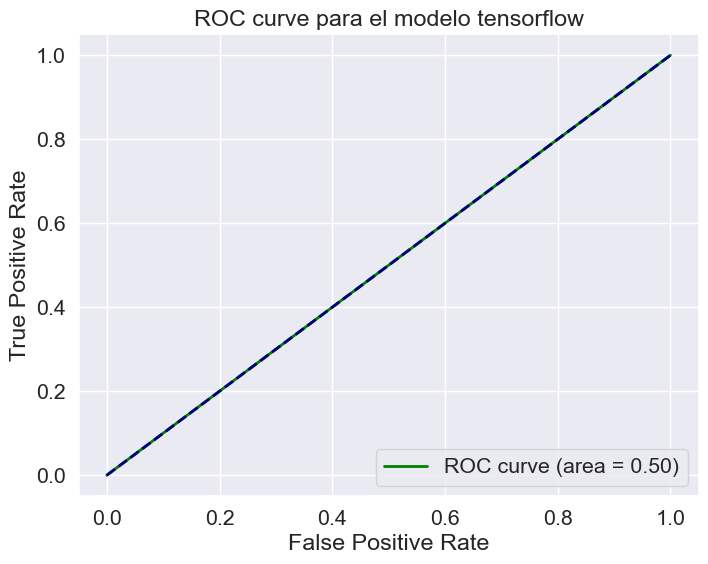

In [55]:
y_prob = model.predict(X_valid)[:, 1]  # Get the predicted probabilities for the positive class
fpr, tpr, _ = roc_curve(y_valid, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve para el modelo tensorflow')
plt.legend(loc="lower right")
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_19560\1987678777.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.3333333333333333, 0.6588235294117647, 0.40784313725490196, 1)). The keyword argument will take precedence.
  plt.plot(epochs, train_loss, 'g', label='Training Loss',color= "green")


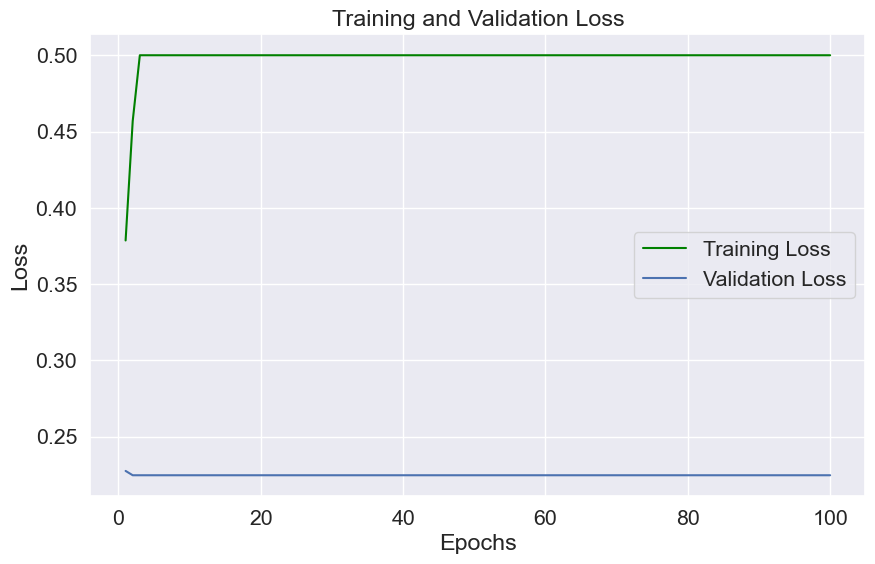

In [19]:
import matplotlib.pyplot as plt

# Get training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range of epoch numbers
epochs = range(1, len(train_loss) + 1)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, 'g', label='Training Loss',color= "green")
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### ¿Cuáles son las características de los clientes que más influyen para que un cliente caiga de default (Y=1)?

In [20]:
import numpy as np
feature_names = X_train_resampled.columns
weights_input_hidden = model.layers[1].get_weights()[0]
average_weights = np.mean(weights_input_hidden, axis=1)
feature_weights = {feature_names[i]: weight for i, weight in enumerate(average_weights)}
sorted_features = sorted(feature_weights.items(), key=lambda x: x[1], reverse=True)
print("Características más importantes de clientes default (Y=1):")
for feature, weight in sorted_features:
    print(f"{feature}: {weight}")


Características más importantes de clientes default (Y=1):
EDUCATION: 0.6243594884872437
SEX: 0.35425040125846863
MARRIAGE: 0.2562969923019409
ID: -0.09417707473039627
LIMIT_BAL: -0.506304144859314


Las características que más influyen para un default payment son: Sex, Marriage, limit_bal y education

## Elaborar gráficas para visualizar distribución de acuerdo con las clases

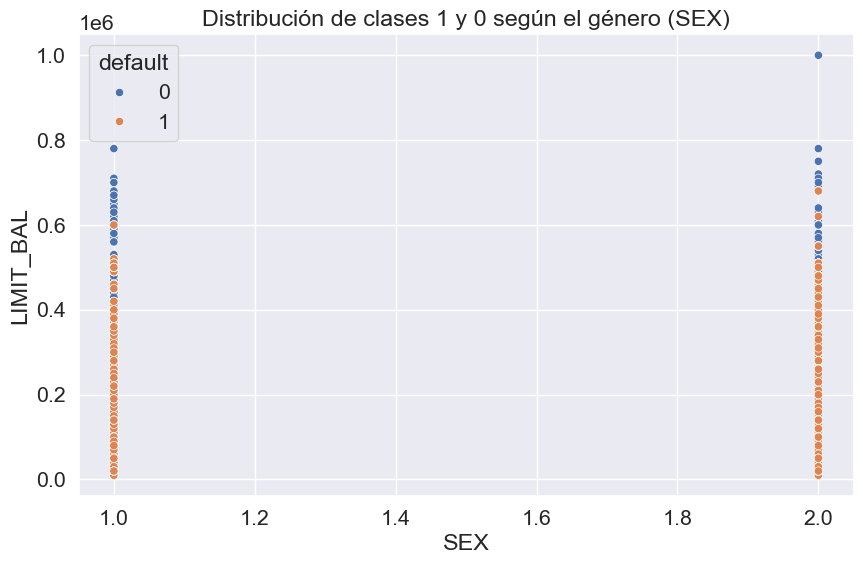

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
data = X_train_resampled.copy()
data['default'] = y_train_resampled
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SEX', y='LIMIT_BAL', hue='default', data=data)
plt.title('Distribución de clases 1 y 0 según el género (SEX)')
plt.show()

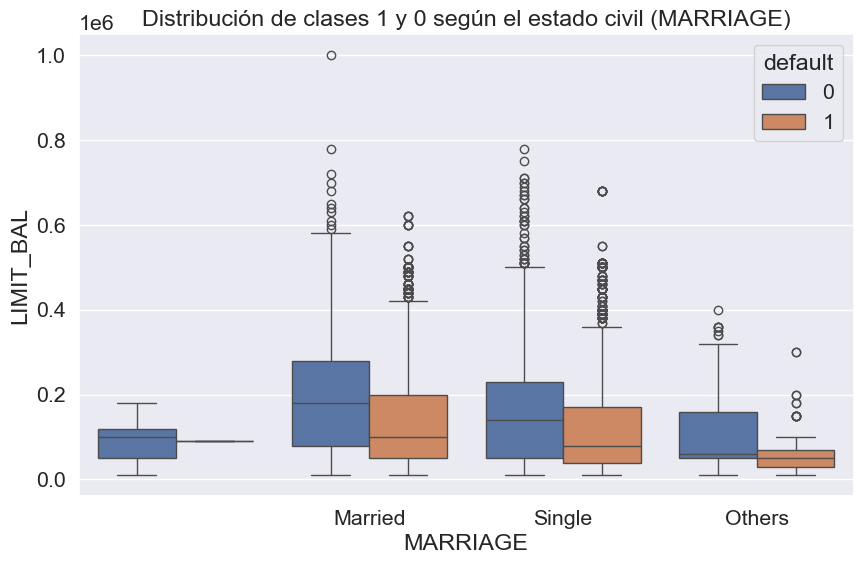

In [22]:
marriage_labels = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
}
plt.figure(figsize=(10, 6))
sns.boxplot(x='MARRIAGE', y='LIMIT_BAL', hue='default', data=data)
plt.title('Distribución de clases 1 y 0 según el estado civil (MARRIAGE)')
plt.xticks(ticks=[1, 2, 3], labels=[marriage_labels[x] for x in [1, 2, 3]])
plt.show()

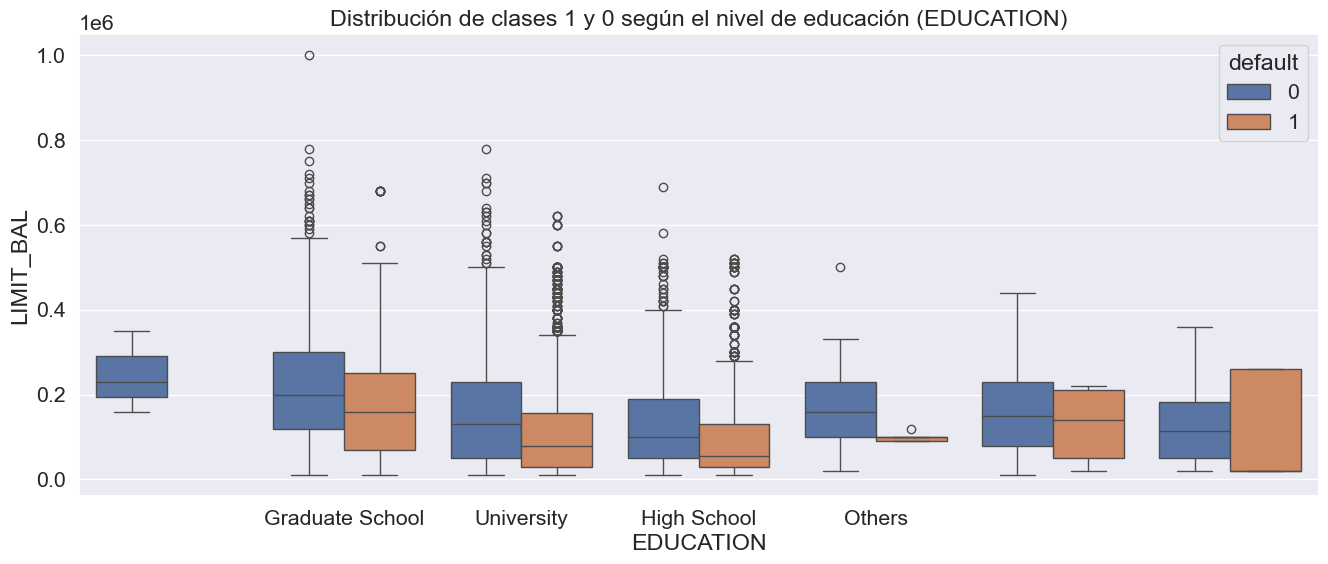

In [23]:
education_labels = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
}
plt.figure(figsize=(16, 6))
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', hue='default', data=data)
plt.title('Distribución de clases 1 y 0 según el nivel de educación (EDUCATION)')
plt.xticks(ticks=[1, 2, 3, 4], labels=[education_labels[x] for x in [1, 2, 3, 4]])
plt.show()